In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### IMPORTING DATA SET

In [14]:
data= pd.read_csv(r"..\data\adult 3.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
print(data.shape)
print(f"{data.info()} \n")

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None 



In [16]:
print(f"{data['age'].value_counts()}\n")
print(f"{data['workclass'].value_counts()}\n")
print(f"{data['education'].value_counts()}\n")
print(f"{data['educational-num'].value_counts()}\n")
print(f"{data['marital-status'].value_counts()}\n")
print(f"{data['occupation'].value_counts()}\n")
print(f"{data['capital-gain'].value_counts()}\n")
print(f"{data['capital-loss'].value_counts()}\n")
print(f"{data['hours-per-week'].value_counts()}\n")
print(f"{data['native-country'].value_counts()}\n")

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3   

### REPLACING SPECIAL CHARACTER(?) WITH "NOTLISTED"

In [17]:
data['workclass'] = data['workclass'].replace({'?': 'NotListed'})
data['occupation'] = data['occupation'].replace({'?': 'NotListed'})
data['native-country'] = data['native-country'].replace({'?': 'NotListed'})

### DELETING THE CATEGORIES WHICH DOES NOT CONTRIBUTE TO INCOME

In [18]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
data=data[~data['education'].isin(['5th-6th','1st-4th','Preschool'])]

### GROUPING LESS OCCURING CATEGORIES TO "RARE"

In [19]:
# Replace rare marital-status with 'Other'
data['marital-status']=data['marital-status'].replace({'Married-AF-spouse':'Others'})

# Replace rare occupation with 'Other'
data['occupation']=data['occupation'].replace({'Priv-house-serv':'Others', 'Armed-Forces':'Others'})

# Set a threshold for frequency
country_counts = data['native-country'].value_counts()
rare_countries = country_counts[country_counts < 100].index

# Replace rare countries with 'Other'
data['native-country'] = data['native-country'].replace(rare_countries, 'Other')


### DROPING THE REDUNDANT OR NOT USEFUL COLUMNS

In [20]:
drop_cols = ['fnlwgt', 'education', 'relationship']
data.drop(drop_cols, axis=1, inplace=True)


### REMOVING THE OUTLIERS

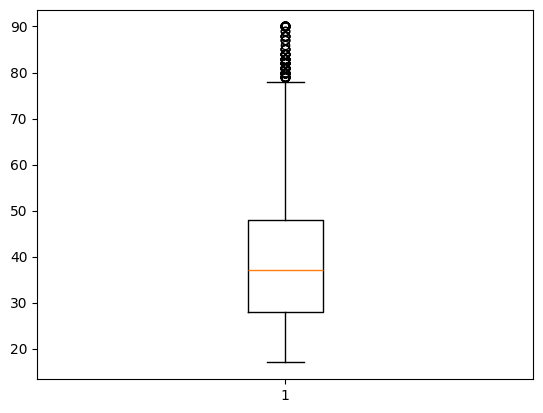

In [21]:
plt.boxplot(data['age'])
plt.show()

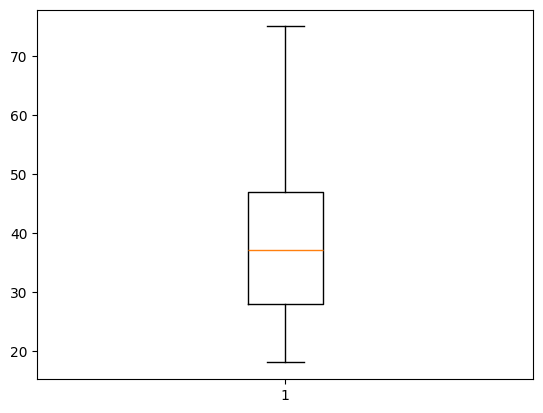

(47029, 12)


In [22]:
data=data[(data['age']>=18) & (data['age']<=75)]
plt.boxplot(data['age'])
plt.show()
print(data.shape)

### SPLITTING THE DATA INTO FEATURES(X) AND TARGET(y)

In [23]:
X= data.drop('income', axis=1)
y= data['income']

### DATA ENCODING

In [24]:
# Gender Encoding
gender_encoder = LabelEncoder()
X['gender'] = gender_encoder.fit_transform(X['gender'])

# Income
income_encoder = LabelEncoder()
y = income_encoder.fit_transform(data['income'])

numerical_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week','gender']
categorical_cols = ['workclass', 'marital-status', 'occupation', 'race', 'native-country']


# Preprocessor: OneHot for categorical, Scale for numeric + label-encoded
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),  # numeric + label encoded
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

### TRAIN/TEST SPLIT

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### MODEL PIPELINE

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42,class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(class_weight='balanced')
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "accuracy": acc,
        "classification_report": classification_report(y_test, y_pred,output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "model": pipeline  # Store pipeline in case you want to save later
    }




### RESULT

In [27]:
# Print results
print("Model Results:\n")
for name, result in results.items():
    print(f"{name} - Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:\n", result['classification_report'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("-" * 60)

Model Results:

Logistic Regression - Accuracy: 0.8046
Classification Report:
 {'0': {'precision': 0.9361914257228315, 'recall': 0.7948645598194131, 'f1-score': 0.8597588890584466, 'support': 7088.0}, '1': {'precision': 0.5708382526564345, 'recall': 0.8343399482312338, 'f1-score': 0.6778829302488608, 'support': 2318.0}, 'accuracy': 0.8045928130980226, 'macro avg': {'precision': 0.753514839189633, 'recall': 0.8146022540253235, 'f1-score': 0.7688209096536537, 'support': 9406.0}, 'weighted avg': {'precision': 0.8461543584075106, 'recall': 0.8045928130980226, 'f1-score': 0.8149376608508535, 'support': 9406.0}}
Confusion Matrix:
 [[5634 1454]
 [ 384 1934]]
------------------------------------------------------------
Random Forest - Accuracy: 0.8419
Classification Report:
 {'0': {'precision': 0.8886884108258154, 'recall': 0.9033577878103838, 'f1-score': 0.8959630588399916, 'support': 7088.0}, '1': {'precision': 0.6887778282598819, 'recall': 0.6540120793787748, 'f1-score': 0.6709448993140075,

### SAVING THE BEST MODEL

In [28]:
# Find and save the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_pipeline = results[best_model_name]['model']

import joblib

# Saving full pipeline (preprocessing + classifier)
joblib.dump(best_pipeline, f"../models/gb_pipeline.pkl")

print("Saved full pipeline model as 'models/gb_pipeline.pkl'")


Saved full pipeline model as 'models/gb_pipeline.pkl'


# MODEL ANALYSIS

### CONFUSION MATRIX

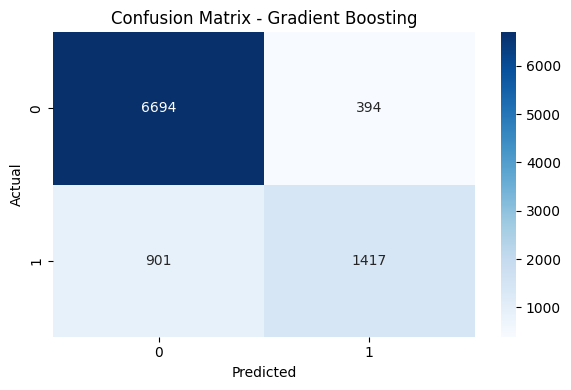

In [29]:
# Visualize confusion matrix for the best model
import seaborn as sns


# Predict on test data using best model
y_pred_best = best_pipeline.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Save confusion matrix to a file
np.save("../streamlit_app/pages/confusion_matrix.npy", cm)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### FEATURE IMPORTANCE PLOT

Feature names: 54
Importances: 54


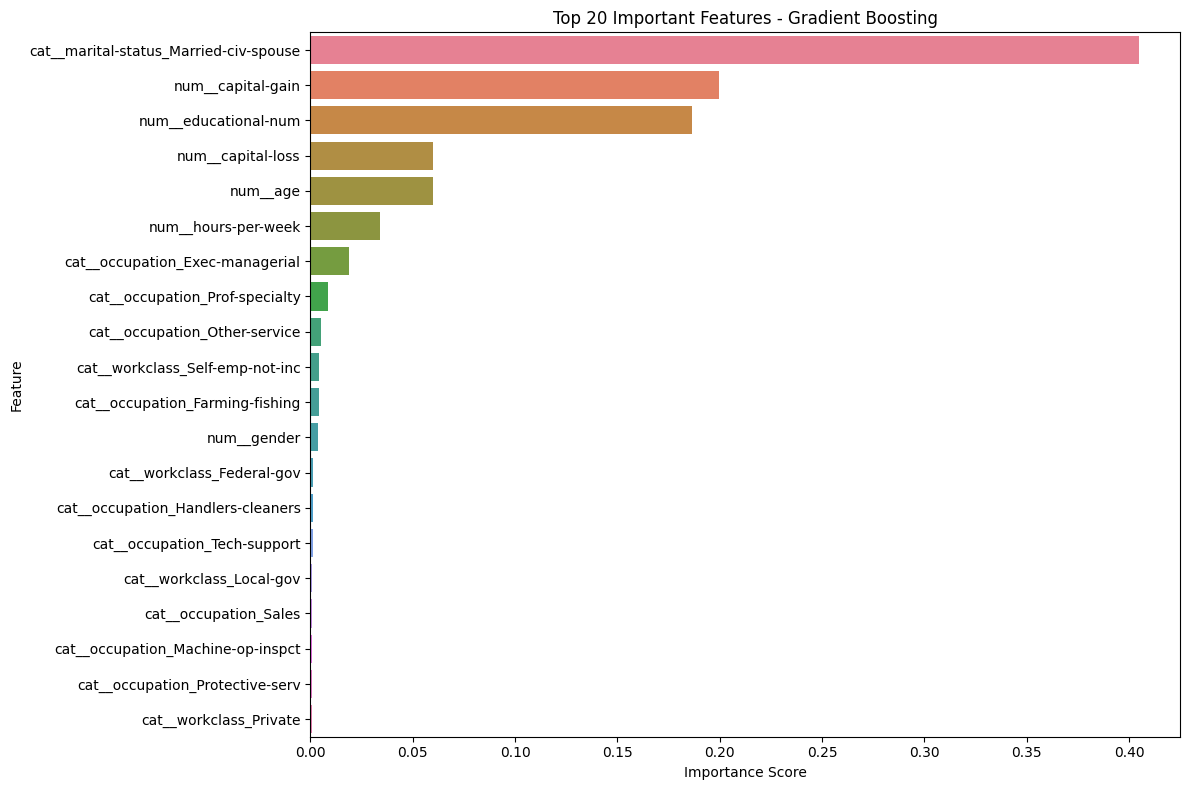

In [30]:
# Step 1: Get the preprocessor and classifier
gb_model = results["Gradient Boosting"]["model"]
preprocessor = gb_model.named_steps["preprocessor"]

# Step 2: Get all feature names directly from the preprocessor
all_feature_names = preprocessor.get_feature_names_out()

# Step 3: Get feature importances from the classifier
importances = gb_model.named_steps["classifier"].feature_importances_

# Sanity check
print("Feature names:", len(all_feature_names))
print("Importances:", len(importances))

# Step 4: Create DataFrame
feature_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(20)

# Step 5: Save to correct location
feature_df.to_csv("../streamlit_app/pages/feature_importance.csv", index=False)


# Step 6: Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_df, x="Importance", y="Feature", hue="Feature", legend=False)

plt.title("Top 20 Important Features - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### PERFORMANCE TABLE

In [31]:
# Extract performance metrics
model_metrics = []

for name, result in results.items():
    report = result['classification_report']

    metrics = {
        "Model": name,
        "Accuracy": round(result['accuracy'], 4),
        "Precision": round(report["macro avg"]["precision"], 4),
        "Recall": round(report["macro avg"]["recall"], 4),
        "F1-score": round(report["macro avg"]["f1-score"], 4)
    }

    model_metrics.append(metrics)

# Create DataFrame
performance_df = pd.DataFrame(model_metrics)
performance_df = performance_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display
print(performance_df)


                 Model  Accuracy  Precision  Recall  F1-score
0    Gradient Boosting    0.8623     0.8319  0.7779    0.7991
1        Random Forest    0.8419     0.7887  0.7787    0.7835
2                  KNN    0.8327     0.7772  0.7590    0.7673
3  Logistic Regression    0.8046     0.7535  0.8146    0.7688
4                  SVC    0.8030     0.7560  0.8237    0.7704


In [32]:
import os

# Creating the directory if not exists
os.makedirs("../streamlit_app/pages", exist_ok=True)

# Saving the file in the correct path
performance_df.to_csv("../streamlit_app/pages/model_performance.csv", index=False)
print("Model performance metrics saved to ../streamlit_app/pages/model_performance.csv")    

Model performance metrics saved to ../streamlit_app/pages/model_performance.csv


### ACCURACY PLOT

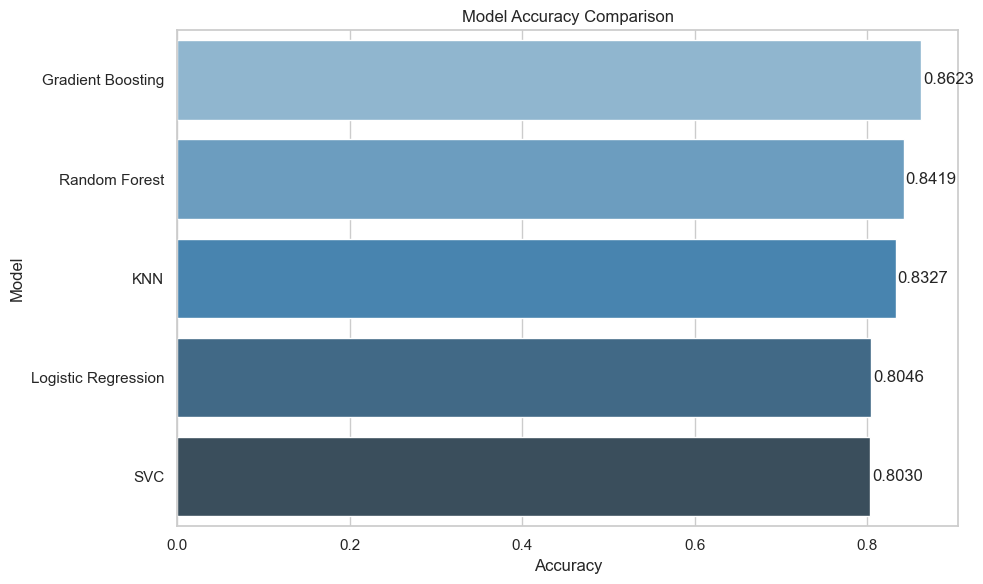

In [33]:
# Set style
sns.set(style="whitegrid")

# Sort models by accuracy for better visualization
sorted_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Plot accuracy bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=sorted_df, hue='Model', palette="Blues_d", legend=False)

# Add value labels to bars
for index, value in enumerate(sorted_df['Accuracy']):
    plt.text(value + 0.002, index, f"{value:.4f}", va='center')

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()
